In [1]:
library(randomForest)
library(readr)
library(h2o)
list.files("../input/train.csv")
list.files("../input/test.csv")
Train<-read.csv("../input/train.csv", sep=",")
Test<-read.csv("../input/test.csv", sep=",")


randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc



character(0)

character(0)

In [2]:
h2o.init()


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmpF8Av2y/h2o_UnknownUser_started_from_r.out
    /tmp/RtmpF8Av2y/h2o_UnknownUser_started_from_r.err


Starting H2O JVM and connecting: . Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 seconds 494 milliseconds 
    H2O cluster version:        3.13.0.3973 
    H2O cluster version age:    12 days  
    H2O cluster name:           H2O_started_from_R_root_rze342 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   24.48 GB 
    H2O cluster total cores:    16 
    H2O cluster allowed cores:  16 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4 
    R Version:                  R version 3.4.1 (2017-06-30) 

In [3]:
Train$SalePrice<- log(Train$SalePrice, base = exp(1))
testh2o<-as.h2o(Test)
trainh2o<-as.h2o(Train)

  |======================================================================| 100%
  |======================================================================| 100%


  |======================================================================| 100%
Model Details:

H2ORegressionModel: drf
Model Key:  DRF_model_R_1502558177955_1 
Model Summary: 
  number_of_trees number_of_internal_trees model_size_in_bytes min_depth
1              50                       50              525286        19
  max_depth mean_depth min_leaves max_leaves mean_leaves
1        20   19.90000        795        897   839.38000

H2ORegressionMetrics: drf
** Reported on training data. **
** Metrics reported on Out-Of-Bag training samples **

MSE:  0.01919966
RMSE:  0.1385628
MAE:  0.09581153
RMSLE:  0.01076061
Mean Residual Deviance :  0.01919966





Scoring History: 
            timestamp   duration number_of_trees training_rmse training_mae
1 2017-08-12 17:16:23  0.231 sec               0                           
2 2017-08-12 17:16:24  1.128 sec               1       0.23145      0.16503
3 2017-08-12 17:16:25  1.531 sec               2       0.21276      0.15295
4 2017-08-12 1

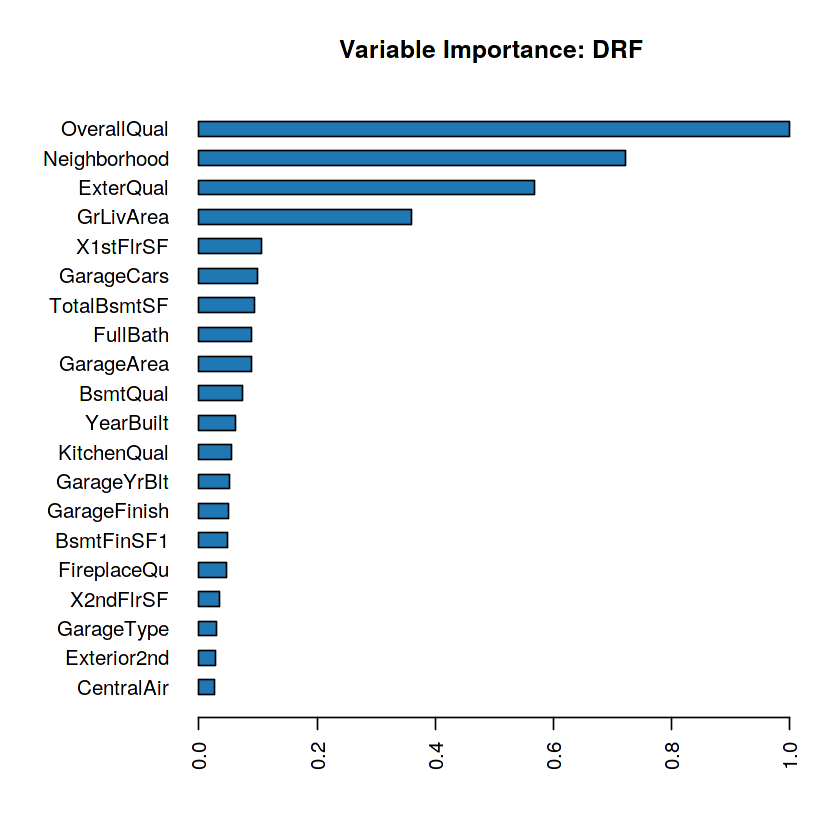

In [4]:
model1<- h2o.randomForest(y="SalePrice",training_frame=trainh2o,seed = 1234)
summary(model1)
h2o.varimp_plot(model1,num_of_features = 20)

In [5]:
attach(Train)
newtrain<-cbind.data.frame(OverallQual,  Neighborhood, ExterQual, GrLivArea,   X1stFlrSF,    
                           GarageCars,  TotalBsmtSF, FullBath,     GarageArea,BsmtQual,     
                           YearBuilt, SalePrice)
detach(Train)

In [6]:
newtrainh2o<-as.h2o(newtrain)

  |======================================================================| 100%


In [7]:
model2<-h2o.deeplearning(y = "SalePrice",training_frame = newtrainh2o,
                         stopping_metric = "RMSE",epochs = 300, 
                         hidden = c(200,200,200,200),nfolds = 3)
summary(model2)

  |======================================================================| 100%
Model Details:

H2ORegressionModel: deeplearning
Model Key:  DeepLearning_model_R_1502558177955_2 
Status of Neuron Layers: predicting SalePrice, regression, gaussian distribution, Quadratic loss, 129,801 weights/biases, 1.5 MB, 379,600 training samples, mini-batch size 1
  layer units      type dropout       l1       l2 mean_rate rate_rms momentum
1     1    44     Input  0.00 %                                              
2     2   200 Rectifier  0.00 % 0.000000 0.000000  0.074230 0.204622 0.000000
3     3   200 Rectifier  0.00 % 0.000000 0.000000  0.162658 0.104574 0.000000
4     4   200 Rectifier  0.00 % 0.000000 0.000000  0.050165 0.050043 0.000000
5     5   200 Rectifier  0.00 % 0.000000 0.000000  0.165471 0.153683 0.000000
6     6     1    Linear         0.000000 0.000000  0.005245 0.002919 0.000000
  mean_weight weight_rms mean_bias bias_rms
1                                          
2   -0.012593

In [8]:
prediction<-as.data.frame(h2o.predict(object = model2,newdata = testh2o))
pred<-exp(prediction$predict)
pred

  |======================================================================| 100%


[1] 124236.51 149077.79 188133.71 197498.18 184419.04 184977.82 174869.11
   [8] 179590.77 191292.76 106216.14 182597.30  99866.01 106353.57 150988.60
  [15] 130560.71 397934.77 248292.91 329670.78 301037.66 297621.06 346243.50
  [22] 201181.33 168702.22 166576.03 173137.55 204697.30 386889.08 227631.75
  [29] 199120.22 213799.35 189306.81  85040.35 156135.75 293625.49 300224.40
  [36] 221799.75 206404.05 157469.13 157469.13 163865.34 172139.85 154365.35
  [43] 239824.88 236895.41 203799.94 152525.10 264804.15 196364.96 158853.30
  [50] 139198.48 142610.55 153415.39 165496.79 142700.66 209175.90 163335.65
  [57] 151375.44 141275.70 201847.23 136394.19 141700.54 171693.07 147198.54
  [64] 123912.12 127756.19 128651.97  99243.23 117685.04 141138.70 157508.74
  [71] 104102.85  83501.61 147573.35  97825.19 130666.01  99601.84  78632.10
  [78] 159306.10 198769.79 118560.29 137613.17 151265.30 169972.10  90188.73
  [85] 115049.83 117223.44 139763.92 138792.72 111760.38 141429.67  90821.74
  [92] 126169.54  99128.91 113496.46 199957.01 116791.83  91513.72 102698.67
  [99] 118324.24 146137.17 136846.26 117147.49 124220.02 143107.38 134870.76
 [106] 260720.36  69298.09 178571.59 113832.42 124044.79 118221.75  69787.01
 [113] 185583.75 141302.78 168447.49 167940.64 194825.53 149334.78 153449.70
 [120] 186676.73 143990.81 131055.02 296536.69 242831.47 149146.42  77592.93
 [127]  90365.91 122388.54 103549.50 131659.75 107459.95 115774.77 121966.47
 [134] 188739.98 132345.08 259783.49 175098.94 177677.52 168974.68 172208.15
 [141]  44565.64 133738.64  78477.43 303807.40 239959.83 175876.22 139368.57
 [148] 189691.28 202803.95 169214.44 153309.42 187658.62 180352.54 103227.22
 [155]  87714.81  87714.81  84674.36 135422.16 136075.15 214700.01 145765.51
 [162] 148552.49 217223.20 199075.48 119182.63 194067.25 178519.35 262937.70
 [169] 177494.67 361993.39 217607.37 263322.69 171771.15 193178.55 174584.55
 [176] 174972.44 197749.26 202485.97 202313.40 213953.58 181555.28 234996.36
 [183] 242680.22 228656.38 171367.43 141697.44 100143.51 155062.28 139173.82
 [190]  98495.64  98799.35 100177.71 102854.80 154416.60 150937.63 149273.95
 [197] 155312.47 145005.35 134180.45 133914.08 418785.06 400278.89 374168.26
 [204] 460021.30 334967.37 272028.03 362515.80 336263.87 304089.53 346598.73
 [211] 223864.24 383255.46 290288.01 248790.88 182976.89 189035.10 192338.71
 [218] 389489.89 394595.66 343583.07 266915.60 284880.37 177641.81 189647.98
 [225] 178813.73 160362.34 173137.55 199327.46 196605.75 192571.47 183222.91
 [232] 272516.58 173137.55 180848.82 178389.56 266130.11 181156.22 364650.41
 [239] 332846.23 259703.39 271886.73 243521.00 241031.88 251117.25 238331.81
 [246] 412236.33 239625.73 200470.82 261845.92 239640.29 289291.29 253450.61
 [253] 220553.91 212755.07 203558.15 167149.32 159890.00 126714.09 204783.04
 [260] 235968.42 165808.41 115103.42 166061.48 203326.75 234449.64 184500.06
 [267] 160913.42 179863.28 160943.99 140919.91 127068.52 131047.18 104128.56
 [274] 123749.11 118658.23 123298.78 406998.77 220006.82 320946.47 199849.14
 [281] 179386.42 172139.85 168029.67 348168.09 314806.61 274097.08 201923.51
 [288] 219819.32 160910.35 155401.40 191488.06 122986.81 174535.43 196457.64
 [295] 166026.12 131093.07 123574.64 143194.13 167351.94 169816.63 149360.53
 [302] 191627.83 175506.01 123826.79 194543.33 162717.12 151429.60 149864.45
 [309] 177298.66 128265.08 138804.98 171420.18 147526.04 136248.43 135129.04
 [316] 146608.47 115358.85 133695.80 113368.76 189114.37 124276.19  83333.13
 [323] 158946.90  81685.07  95354.39 139946.80 158138.78  38256.23  94579.19
 [330]  66257.84 218905.41 156201.73 132948.34 122174.60 140178.97 125599.89
 [337] 145592.62 130960.89 112164.34 134968.12 139259.07 142836.68 146904.73
 [344] 140486.18 141732.44 127021.48 119694.41 112349.86 105529.43 130730.80
 [351] 104900.15 108074.01 125432.25  85968.67  57859.99  91149.75 124804.77
 [358] 137890.11 113698.87  63474.01 103392.43 133868.67  45468.42 150207.27

In [9]:
library(data.table)
Test$Id<-as.character(Test$Id)
submission<- data.table(Id=Test$Id, SalePrice=pred)
write.table(submission, "houseprice_submission.csv",sep=",",dec = ".", quote=FALSE, row.names=FALSE)


Attaching package: ‘data.table’

The following objects are masked from ‘package:h2o’:

    hour, month, week, year

